# Support Vector Machines

We will implement both hard-margin SVMs and soft-margin SVMs from scratch on a toy dataset. Apart from NumPy, we should need to take the help of Scipy for solving the quadratic porgramming problem.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6,6]

## Hard-Margin SVM

In [ ]:
#### DATA

X = np.array([[1,-3], [1,0], [4,1], [3,7], [0,-2], [-1,-6], [2,5],
              [1,2], [0,-1], [-1,-4], [0,7], [1,5], [-4,4], [2,9],
              [-2,2], [-2,0], [-3,-2], [-2,-4], [3,10], [-3,-8]]).T

y = np.array([1, 1, 1, 1, 1,
             1, 1, 1, 1, 1,
             -1, -1, -1, -1, -1,
             -1, -1, -1, -1, -1])

X.shape, y.shape

((2, 20), (20,))

### Visualize the dataset

Let us know the dataset given to us using a scatter plt. We will colour points which belong to class +1 `green` and those that belong to -1 `red`. Following this, we shall inspect the data visually and determine its linlear separability.

In [ ]:
y_col = np.where(y == 1, 'green', 'red')
y_col

array(['green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red'], dtype='<U5')

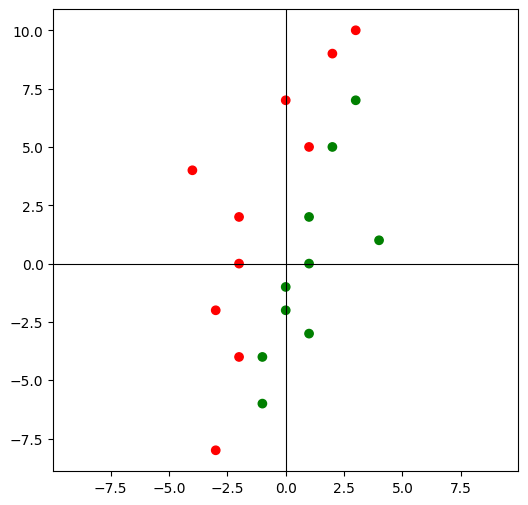

In [ ]:
plt.scatter(X[0, : ], X[1, : ], c = y_col)
plt.axis('equal')
plt.axhline(color = 'black', linewidth = 0.8)
plt.axvline(color = 'black', linewidth = 0.8)

In [ ]:
# Step 1 : Assign w_o = [0, 0]^T
# Step 2 : w^T x >= 0 , y_hat = 1, -1 o.w
# Step 3 : We check this for all the data points
# Step 4 : If there is a mistake, we update the weights. w_{t+1} = w_t + xy
# STep 5 : Repeat this process until no mistakes are beign made. We can say that the algorithm has converged.


### Linear Separability

Is there another way to determine linear separability ? Yes! we can train a perceptron and see if it converges in a finite amount of time. But a cavecat: this method can be used to verify linear separability. It cannot be used to prove linear separability.

In [ ]:
d, n = X.shape

In [ ]:
correct = 0
i = 0
w = np.zeros(d)
epochs = 0

while correct != n :
  # prediction
  y_hat = 1 if w @ X[ : , i] >= 0 else -1
  # mistake or not
  if y[i] != y_hat :
    w += X[ : , i] * y[i]
    correct = 0
  else :
    correct += 1
  i += 1
  # cycle back
  if i == n :
    i = 0
    epochs += 1

print(f"Converges in {epochs} epochs")
w /= np.linalg.norm(w)
w

Converges in 4 epochs


array([ 0.94174191, -0.3363364 ])

Let us now visualize the perceptron's weight vector and the corresponding decision boundary.

In [ ]:
y_color = np.where(y == 1, 'green', 'red')
y_color

array(['green', 'green', 'green', 'green', 'green', 'green', 'green',
       'green', 'green', 'green', 'red', 'red', 'red', 'red', 'red',
       'red', 'red', 'red', 'red', 'red'], dtype='<U5')

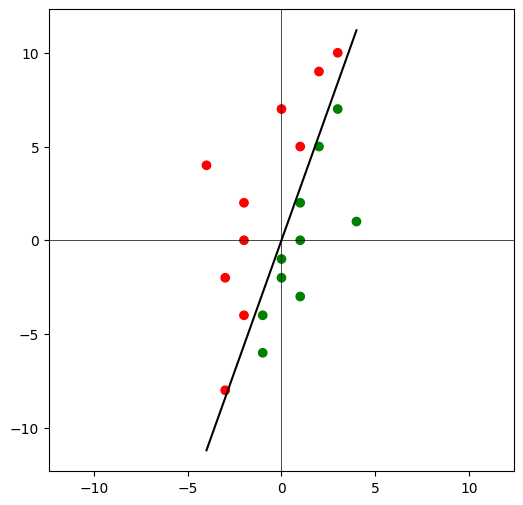

In [ ]:
plt.scatter(X[0, : ], X[1, : ], c = y_color)
plt.axis('equal')
plt.axhline(color = 'black', linewidth = 0.5)
plt.axvline(color = 'black', linewidth = 0.5)

x_db = np.linspace(-4,4)
y_db = - (w[0] / w[1]) * x_db

plt.plot(x_db, y_db, color = 'black')

Let us now visualize the perceptron's weight vector and the corresponding decision boudnary

(np.float64(-4.4), np.float64(4.4), np.float64(-12.32), np.float64(12.32))

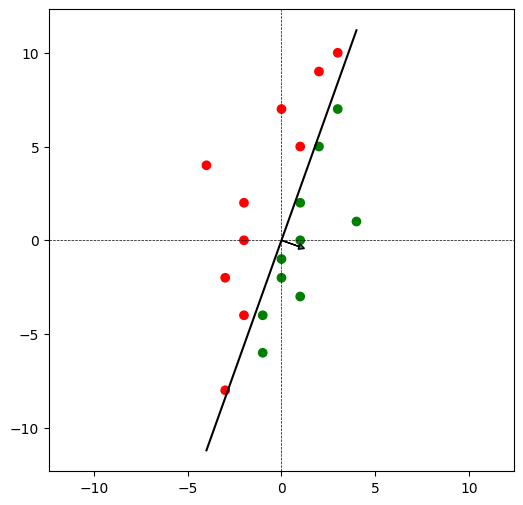

In [ ]:
plt.scatter(X[0 , : ], X[1, : ], c = y_color)
plt.axhline(color = 'black', linestyle = '--', linewidth = 0.5)
plt.axvline(color = 'black', linestyle = '--', linewidth = 0.5)

x_db = np.linspace(-4, 4)
y_db = -w[0] / w[1] * x_db

plt.plot(x_db, y_db, color = 'black')
plt.arrow(
    0, 0, w[0], w[1],
    head_width = 0.3,
    head_length = 0.3
)

plt.xlim(-6,6)
plt.ylim(-6,6)
plt.axis('equal')

- Step 1 : Solving the dual problem, we will get alpha.
- Step 2 : The points for which alpha_i > 0 are my support vectors
- Step 3 : w_optimal = XYalpha
- Step 4 : X : d * n
- Step 5 : Y : n * n : a diagonal matrix
- Step 6 : alpha : n * 1

### Computing the Dual objective

We shall follow a step-by-step approach to computing the dual objective function.

#### **STEP 1**


We compute the object **Y** that appears in the dual problem.

In [ ]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1])

In [ ]:
Y = np.diag(y)
Y.shape

(20, 20)

#### **STEP 2**

Let **α** be the dual variable. The dual objective is of the form :     

$$
f(\boldsymbol{\alpha}) = \boldsymbol{\alpha}^T \mathbf{1} - \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha}
$$

Next, we compute the matrix $\mathbf{Q}$ for this problem.

**Q = Yᵀ (XᵀX)Y**

In [ ]:
Q = Y.T @ X.T @ X @ Y
Q.shape

(20, 20)

#### **STEP 3**

 Since `scipy`'s optimization routines take the form of minimizing a function, we will recast 𝓕 as follows :     

$$
f(\boldsymbol{\alpha}) =  \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

We now have to solve :      

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad f(\boldsymbol{\alpha})
$$

Note that $\max$ changes to $\min$ since we changed the sign of the objective function.

### Optimize

Finally, we have most of the ingredients to solve the dual problem :    

$$
\min \limits_{\boldsymbol{\alpha} \geq 0} \quad \cfrac{1}{2} \cdot \boldsymbol{\alpha}^T \mathbf{Q} \boldsymbol{\alpha} - \boldsymbol{\alpha}^T \mathbf{1}
$$

Find the optimal value, $\boldsymbol{\alpha^{*}}$.

In [ ]:
def f(alpha) :
  return 0.5 * alpha.T @ Q @ alpha - np.sum(alpha)

In [ ]:
from scipy import optimize

alpha_init = np.zeros(n)
res = optimize.minimize(
    f,
    alpha_init,
    bounds = optimize.Bounds(0, np.inf))
res

  message: CONVERGENCE: RELATIVE REDUCTION OF F <= FACTR*EPSMCH
  success: True
   status: 0
      fun: -4.9999999995860795
        x: [ 0.000e+00  0.000e+00 ...  1.714e+00  1.629e+00]
      nit: 30
      jac: [ 5.000e+00  2.000e+00 ...  2.964e-04 -2.446e-04]
     nfev: 735
     njev: 35
 hess_inv: <20x20 LbfgsInvHessProduct with dtype=float64>

In [ ]:
res.x.shape

(20,)

In [ ]:
alpha_star = res.x
alpha_star

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.64285458, 1.65714081, 1.6714273 , 1.68571323,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.71428397, 1.62856746])

### Support Vectors

Let us find all the support vectors. Recall that support vectors are those ponts for whcih $\alpha_i^{*} > 0$.

In [ ]:
X_sup = X[ : , alpha_star > 0]
y_sup = y[alpha_star > 0]
y_sup_color = np.where(y_sup == 1, 'green', 'red')
print(y_sup.shape[0])

6


We see that there are 6 support vectors.

### Optimal weight vector (Primal solution)

Let us now find the optimal weight vector $\mathbf{w}^*$.

In [ ]:
w_star = X @ Y @ alpha_star
w_star

array([ 2.9999872 , -1.00002577])

This is pretty close to **(3, -1)**

### Decision Boundary

Now we plot the decision boundary along with the supporting hyperplanes. Note where the support vectors lie in this plot

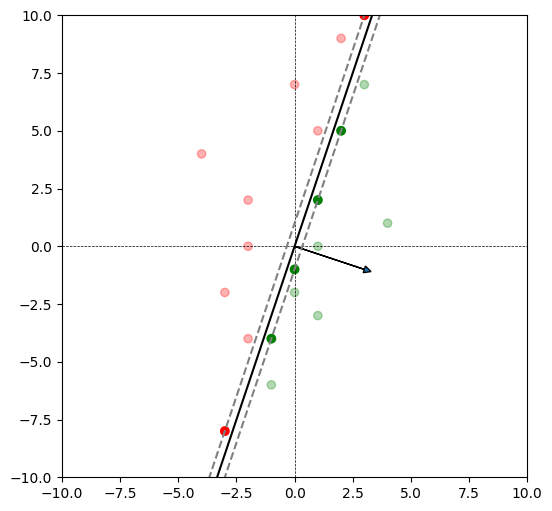

In [ ]:
def plot_db(w) :
  plt.scatter(X[0 , : ], X[1, : ], c = y_color, alpha = 0.3)

  plt.scatter(X_sup[0, : ], X_sup[1, : ], c = y_sup_color)

  plt.axhline(color = 'black', linestyle = '--', linewidth = 0.5)
  plt.axvline(color = 'black', linestyle = '--', linewidth = 0.5)

  x_db = np.linspace(-4, 4)
  y_db = -w[0] / w[1] * x_db
  # decision boundary
  plt.plot(x_db, y_db, color = 'black')

  # supporting hyperplanes
  y_sup_1 = 1/w[1] - w[0] / w[1] * x_db
  y_sup_2 = -1 / w[1] - w[0] / w[1] * x_db
  plt.plot(x_db, y_sup_1, color = 'gray', linestyle = '--')
  plt.plot(x_db, y_sup_2, color = 'gray', linestyle = '--')

  plt.arrow(0, 0, w[0], w[1], head_width = 0.3, head_length = 0.3)
  plt.xlim(-10, 10)
  plt.ylim(-10, 10)


plot_db(w_star)

Note that the support vector appear darker than the rest of the points.